
# Fraud Detection 

This project aims to enhance the accuracy of detecting fraud in mobile financial transactions. By leveraging machine learning, the project seeks to predict fraudulent transactions with high precision. The goal is to develop a robust machine learning model to accurately identify fraudulent transactions in real-time , enabling the company to improve security, reduce financial losses, and gain insights into factors contributing to transaction fraud.


In [94]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import scipy.stats as stat
from sklearn.preprocessing import LabelEncoder
from imblearn.over_sampling import SMOTE
import pylab
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
!pip install xgboost
import xgboost as xgb
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,ConfusionMatrixDisplay
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV


## Data Collection

Here we load the given data as pandas dataframe using read_csv, we name the dataframe as fraud_data.

In [95]:
fraud_data= pd.read_csv('C:/Users/91701/OneDrive/Desktop/BIA_project/Fraud_Analysis_Dataset.csv')

In [96]:
fraud_data

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud
0,1,TRANSFER,181.00,C1305486145,181.00,0.00,C553264065,0.00,0.00,1
1,1,CASH_OUT,181.00,C840083671,181.00,0.00,C38997010,21182.00,0.00,1
2,1,TRANSFER,2806.00,C1420196421,2806.00,0.00,C972765878,0.00,0.00,1
3,1,CASH_OUT,2806.00,C2101527076,2806.00,0.00,C1007251739,26202.00,0.00,1
4,1,TRANSFER,20128.00,C137533655,20128.00,0.00,C1848415041,0.00,0.00,1
...,...,...,...,...,...,...,...,...,...,...
11137,7,DEBIT,6393.71,C1331144930,433084.38,426690.68,C684896216,478421.00,210535.25,0
11138,7,CASH_OUT,298799.54,C932023579,426690.68,127891.14,C1761353343,704355.36,5270364.19,0
11139,7,CASH_OUT,423159.63,C61395726,127891.14,0.00,C1298316171,610479.00,749621.53,0
11140,7,PAYMENT,1094.03,C1224570697,13918.00,12823.97,M983553548,0.00,0.00,0



## Exploratory Data Analysis

We will conduct EDA on the given data. First of all we see that there are no null or missing values in the data. We also extract the data type of all columns. Also we find informations like mean, min value, max value, count etc.

In [97]:
fraud_data.info()
fraud_data.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11142 entries, 0 to 11141
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   step            11142 non-null  int64  
 1   type            11142 non-null  object 
 2   amount          11142 non-null  float64
 3   nameOrig        11142 non-null  object 
 4   oldbalanceOrg   11142 non-null  float64
 5   newbalanceOrig  11142 non-null  float64
 6   nameDest        11142 non-null  object 
 7   oldbalanceDest  11142 non-null  float64
 8   newbalanceDest  11142 non-null  float64
 9   isFraud         11142 non-null  int64  
dtypes: float64(5), int64(2), object(3)
memory usage: 870.6+ KB


step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
dtype: int64

In [98]:
fraud_data.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud
count,11142.000000,1.114200e+04,1.114200e+04,1.114200e+04,1.114200e+04,1.114200e+04,11142.000000
mean,8.717645,2.131915e+05,9.241173e+05,8.249576e+05,8.883541e+05,1.103211e+06,0.102495
std,16.067479,7.600650e+05,2.143004e+06,2.089894e+06,2.601376e+06,2.982447e+06,0.303312
min,1.000000,2.390000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000
25%,2.000000,4.946618e+03,4.270000e+02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000
50%,6.000000,1.676126e+04,2.816950e+04,4.420605e+03,0.000000e+00,0.000000e+00,0.000000
75%,7.000000,1.543366e+05,3.040855e+05,1.114126e+05,2.711555e+05,3.186374e+05,0.000000
max,95.000000,1.000000e+07,1.990000e+07,1.300000e+07,3.300000e+07,3.460000e+07,1.000000


In [99]:
fraud_data['type'].value_counts()

type
PAYMENT     5510
CASH_IN     1951
CASH_OUT    1871
TRANSFER    1464
DEBIT        346
Name: count, dtype: int64

In [100]:
fraud_data['isFraud'].value_counts()

isFraud
0    10000
1     1142
Name: count, dtype: int64

<Axes: xlabel='amount', ylabel='Count'>

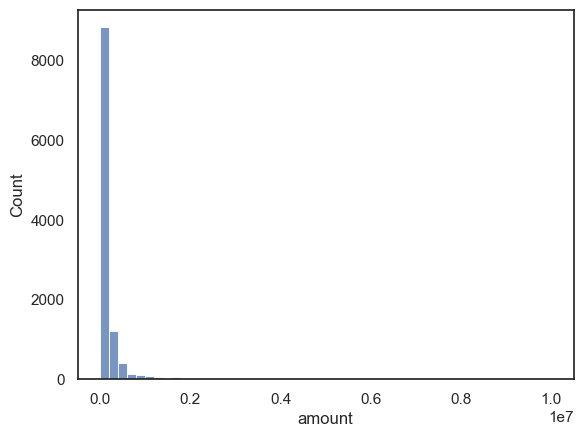

In [101]:
sns.histplot(data=fraud_data, x="amount", bins=50)

<Axes: xlabel='newbalanceOrig', ylabel='Count'>

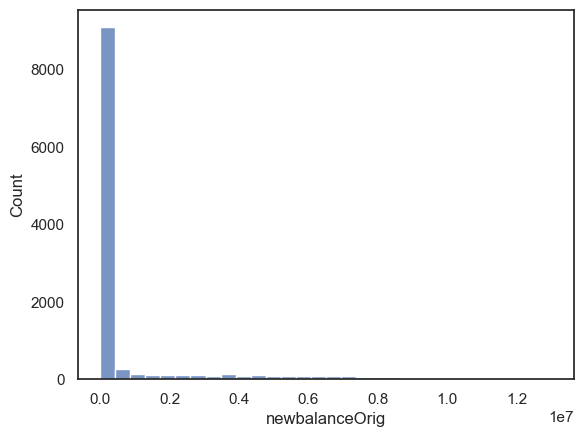

In [102]:
sns.histplot(data=fraud_data, x="newbalanceOrig", bins=30)

<Axes: xlabel='oldbalanceOrg', ylabel='Count'>

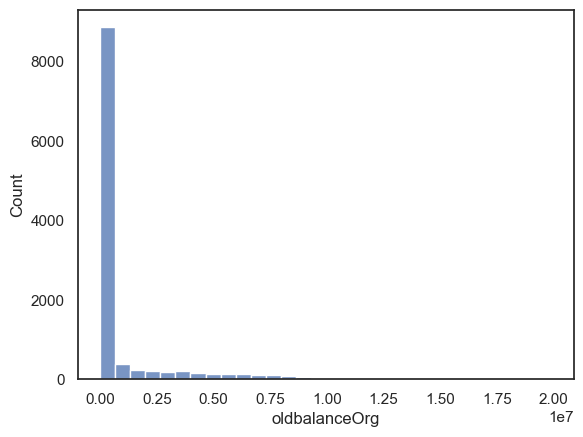

In [103]:
sns.histplot(data=fraud_data, x="oldbalanceOrg", bins=30)

<Axes: xlabel='oldbalanceDest', ylabel='Count'>

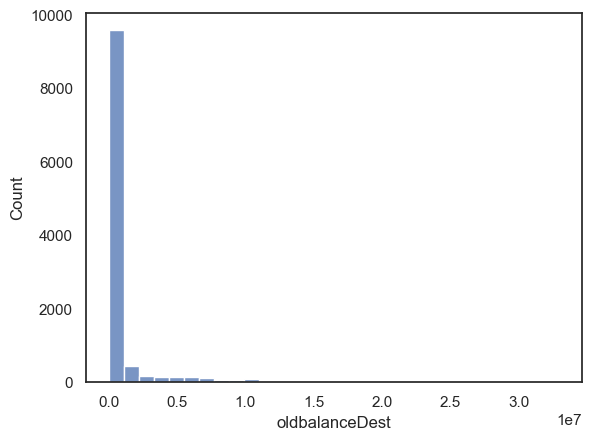

In [104]:
sns.histplot(data=fraud_data, x="oldbalanceDest", bins=30)

<Axes: xlabel='newbalanceDest', ylabel='Count'>

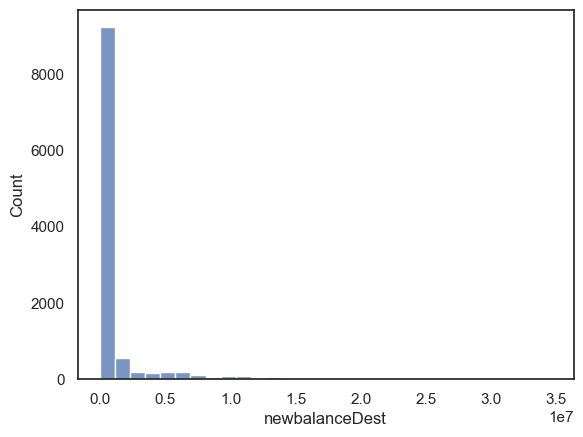

In [105]:
sns.histplot(data=fraud_data, x="newbalanceDest", bins=30)

- We find the count of each category for two categorical variable i.e. 'type' and 'isFraud'. We see that our target variable 'isFraud' is highly imbalanced.
- We make histogram for the variables amount, oldbalanceOrg, newbalanceOrig, oldbalanceDest, newbalanceDest and all these variables are right skewed.

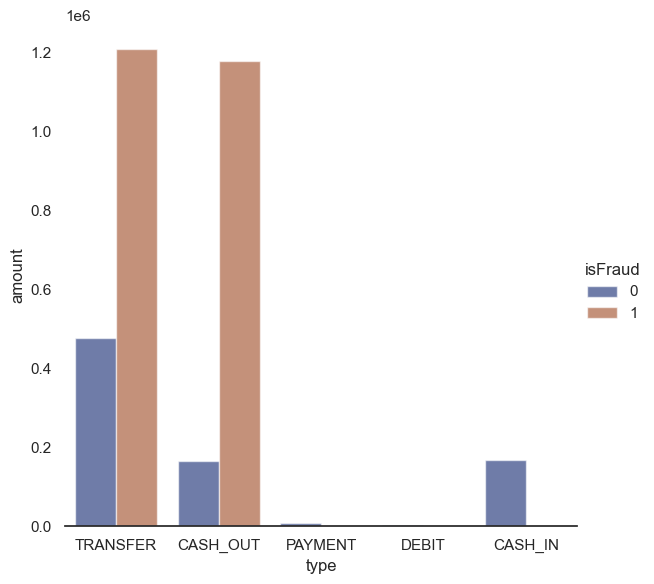

In [106]:
g = sns.catplot(
    data=fraud_data, kind="bar",
    x="type", y="amount", hue="isFraud",
    errorbar=None, palette="dark", alpha=.6, height=6
)
g.despine(left=True)
g.set_axis_labels("type", "amount")

The above bar graph is really important in identifying the fraud transaction. Here we plot 'type' variable against 'amount'. It is clear that TRANSFER and CASH_OUT are having fraudulent transaction and the amount of fraudulent transaction is actually very high as compared to the non fraudulent ones.

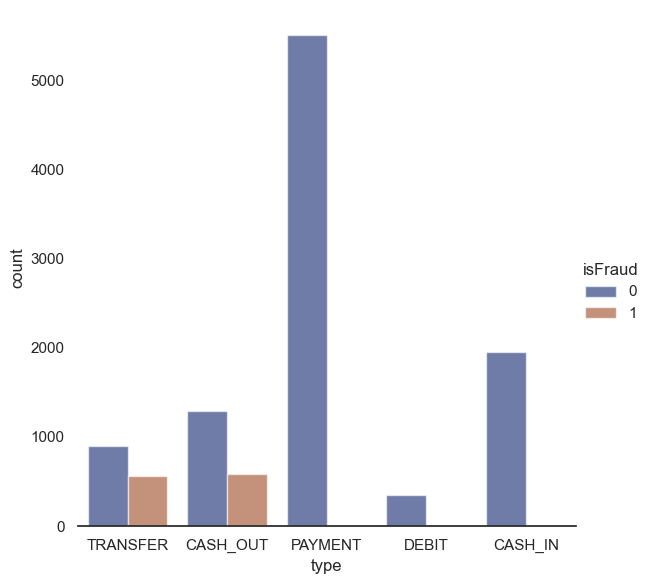

In [107]:
g = sns.catplot(
    data=fraud_data, kind="count",
    x="type", hue="isFraud",
    errorbar=None, palette="dark", alpha=.6, height=6
)
g.despine(left=True)
g.set_axis_labels("type", "count")

This bar graph is also really important as it shows the number of transaction in each category of 'type' variable. It is clear that PAYMENT category has highest number transactions but non fraudulent ones. Only TRANSFER and CASH_OUT has fraudulent transactions and the number of transaction(contrary to amount) is lesser than non fraudulent transactions.

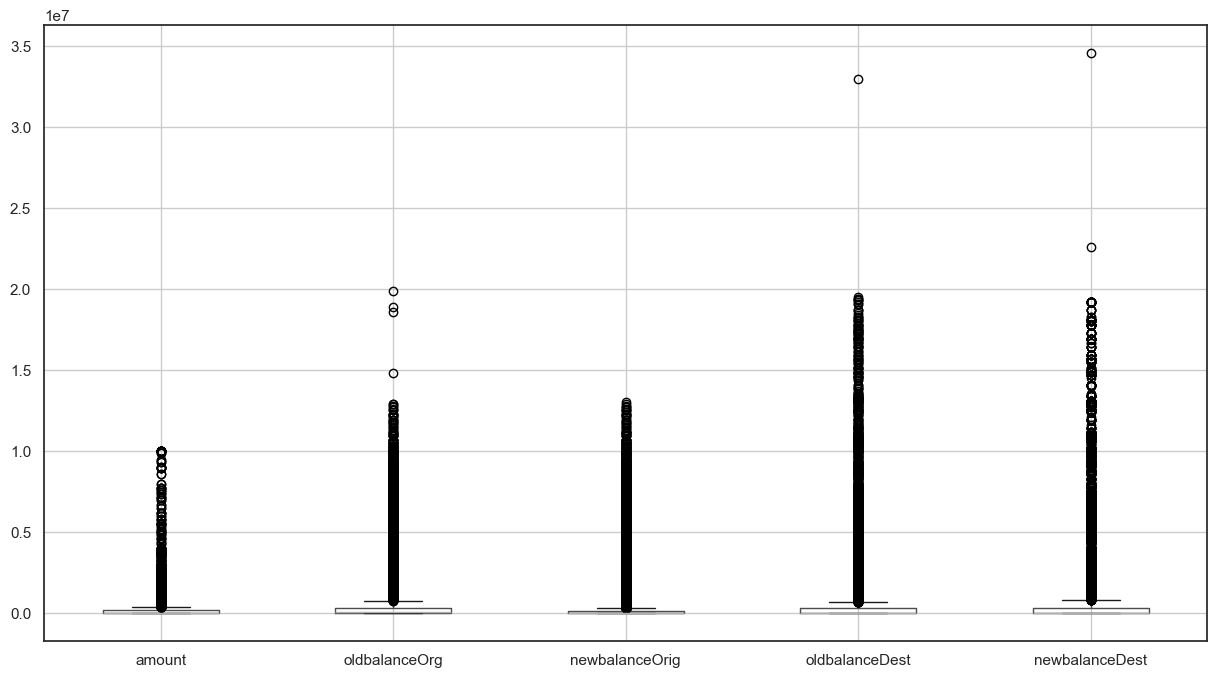

In [108]:
boxplot = fraud_data.boxplot(column=['amount', 'oldbalanceOrg',	'newbalanceOrig', 'oldbalanceDest',	'newbalanceDest'], figsize=(15,8))

Here we see that there a lot of outliers in 'amount', 'oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest' 'newbalanceDest' but we can't remove the outliers directly as for this problem statement outliers may hold important information.

## Preprocessing



In [109]:
def plot_data (df, feature):
    plt.figure(figsize=(10,6))
    plt.subplot(1,2,1)
    df[feature].hist() # this is the histogram
    plt.subplot(1,2,2)
    stat.probplot(df[feature],dist='norm',plot=pylab) # this is the Q-Q plot
    plt.show()

-0.012496150884763723


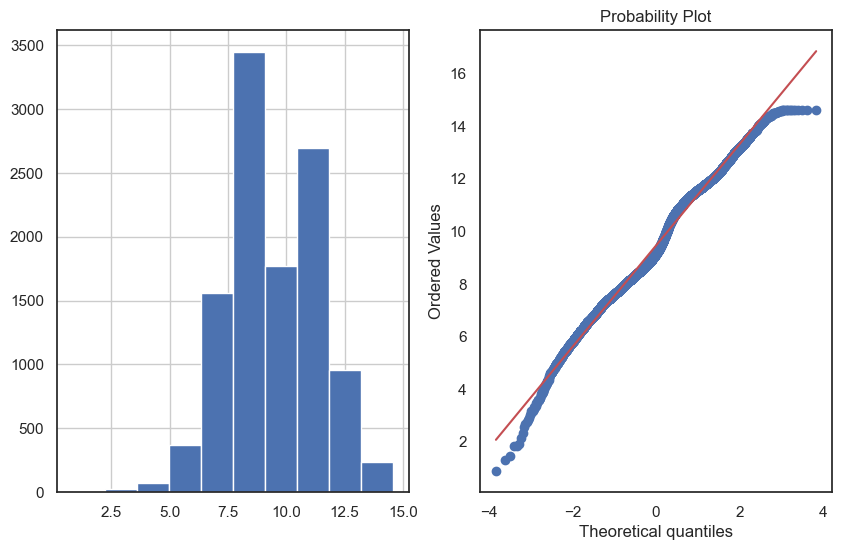

In [110]:
fraud_data['amount_boxcox'],parameters=stat.boxcox(fraud_data['amount'])
print(parameters)
plot_data(fraud_data, 'amount_boxcox')

0.07652149324810878


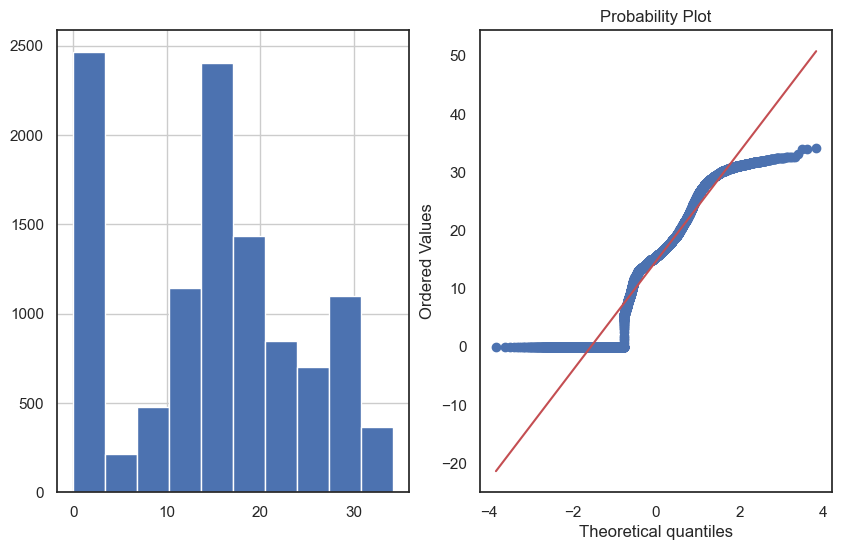

In [111]:
fraud_data['oldbalanceOrg_Boxcox'],parameters=stat.boxcox(fraud_data['oldbalanceOrg'] + 1)
print(parameters)
plot_data(fraud_data, 'oldbalanceOrg_Boxcox')

-0.020555735455221158


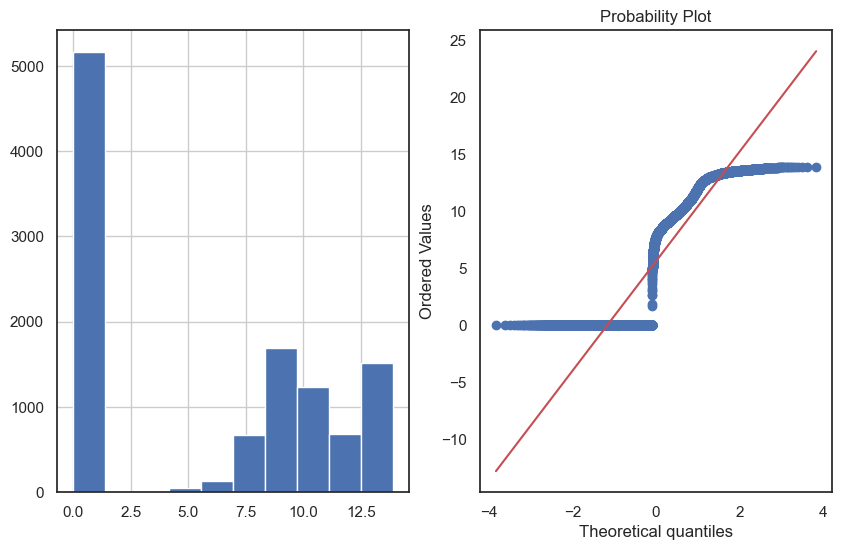

In [112]:
fraud_data['newbalanceOrig_Boxcox'],parameters=stat.boxcox(fraud_data['newbalanceOrig'] + 1)
print(parameters)
plot_data(fraud_data, 'newbalanceOrig_Boxcox')

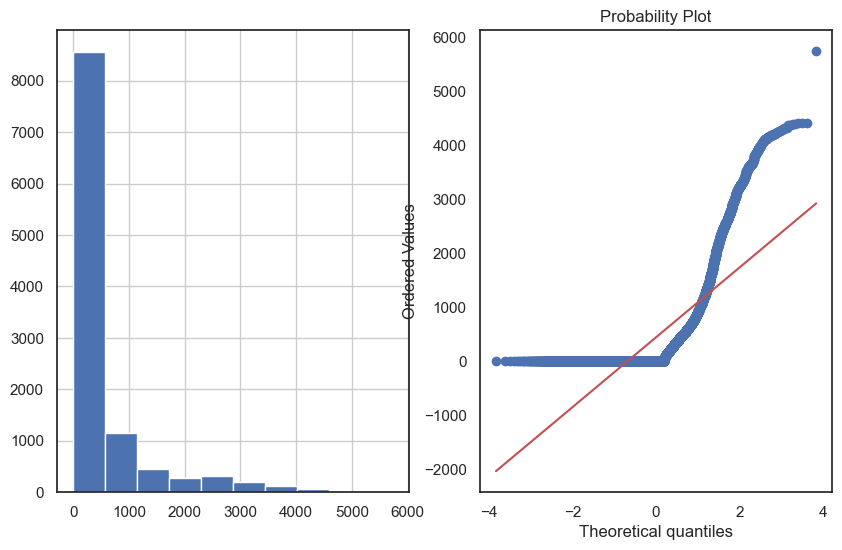

In [113]:
fraud_data['oldbalanceDest_square']=fraud_data.oldbalanceDest**(1/2)
plot_data(fraud_data, 'oldbalanceDest_square')

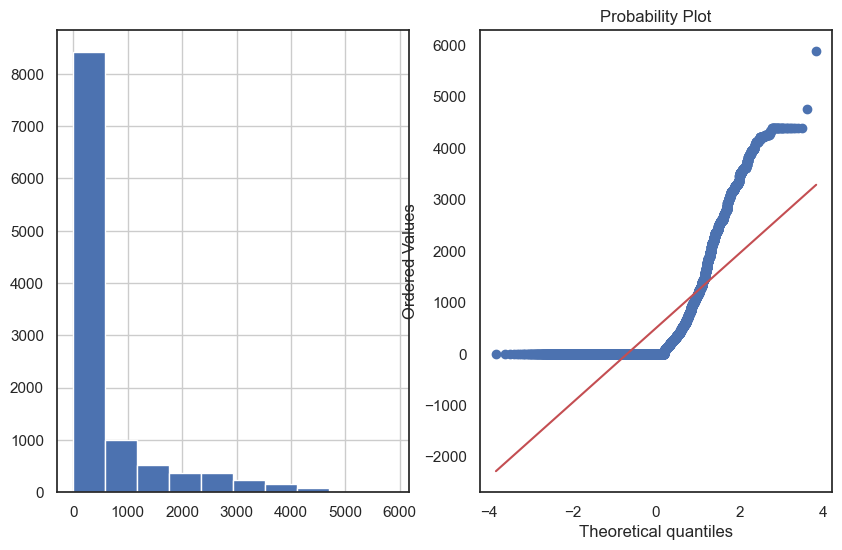

In [114]:
fraud_data['newbalanceDest_square']=fraud_data.newbalanceDest**(1/2)
plot_data(fraud_data, 'newbalanceDest_square')

- If we want to implement Logistic Regression algorithm we have to convert all skewed data into normally distributed data for that we are using Boxcox method to convert the data.
- Also we use Q-Q plot to check how much the data has become normally distributed after applying Boxcox method. The more the curve is aligned to the straight red line the more the curve is normally distributed.
- Also in the boxplot graph below we see that outliers have reduced because the boxcox method reduces outliers also while converting it into normally distributed. 

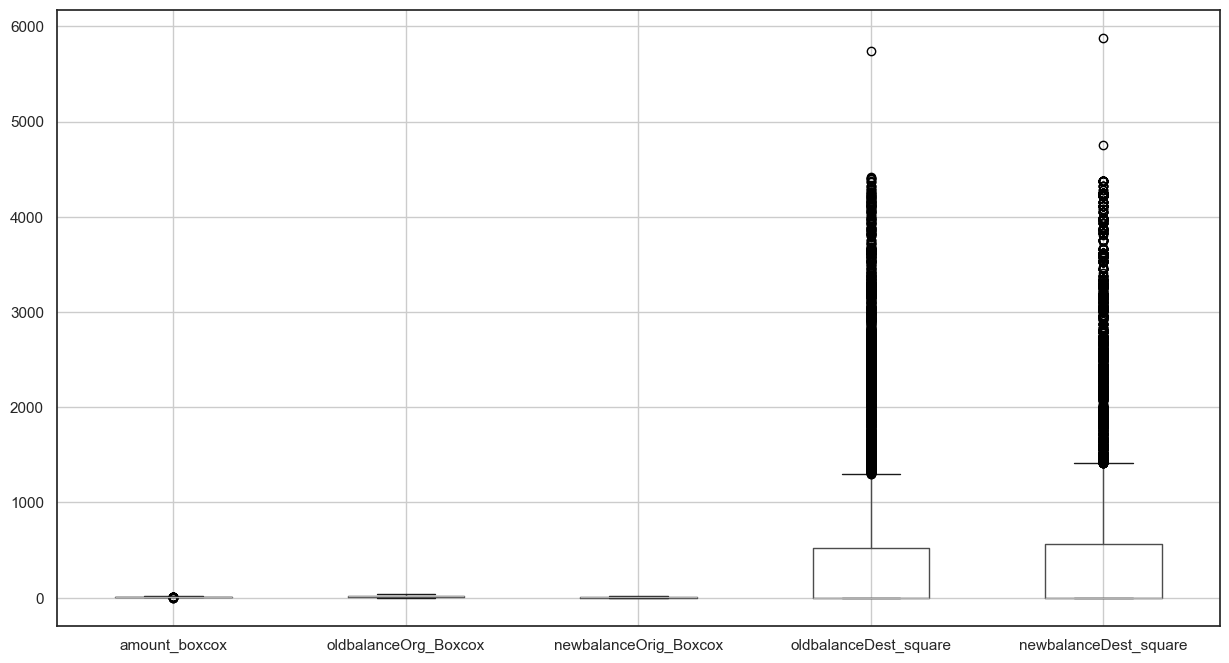

In [115]:
boxplot = fraud_data.boxplot(column=['amount_boxcox', 'oldbalanceOrg_Boxcox', 'newbalanceOrig_Boxcox', 'oldbalanceDest_square', 'newbalanceDest_square'], figsize=(15,8))

*converting the categorical data into numerical data*

In [116]:
encoder = LabelEncoder()
fraud_data['type'] = encoder.fit_transform(fraud_data['type'])
fraud_data['nameOrig'] = encoder.fit_transform(fraud_data['nameOrig'])
fraud_data['nameDest'] = encoder.fit_transform(fraud_data['nameDest'])

In [117]:
fraud_data

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,amount_boxcox,oldbalanceOrg_Boxcox,newbalanceOrig_Boxcox,oldbalanceDest_square,newbalanceDest_square
0,1,4,181.00,1751,181.00,0.00,1517,0.00,0.00,1,5.033244,6.392572,0.000000,0.000000,0.000000
1,1,1,181.00,10212,181.00,0.00,1338,21182.00,0.00,1,5.033244,6.392572,0.000000,145.540372,0.000000
2,1,4,2806.00,2397,2806.00,0.00,1968,0.00,0.00,1,7.558371,10.924592,0.000000,0.000000,0.000000
3,1,1,2806.00,6397,2806.00,0.00,8,26202.00,0.00,1,7.558371,10.924592,0.000000,161.870318,0.000000
4,1,4,20128.00,2130,20128.00,0.00,867,0.00,0.00,1,9.320835,14.828388,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11137,7,2,6393.71,1888,433084.38,426690.68,1651,478421.00,210535.25,0,8.300316,22.212346,11.380244,691.679839,458.841203
11138,7,1,298799.54,10749,426690.68,127891.14,774,704355.36,5270364.19,0,11.664561,22.172215,10.445700,839.258816,2295.727377
11139,7,1,423159.63,8872,127891.14,0.00,284,610479.00,749621.53,0,11.961171,19.068373,0.000000,781.331556,865.806866
11140,7,3,1094.03,1258,13918.00,12823.97,7463,0.00,0.00,0,6.700402,14.051898,8.596347,0.000000,0.000000


*creating a heatmap to find the correlation between different parameters and between parameters and target variables*

<Axes: >

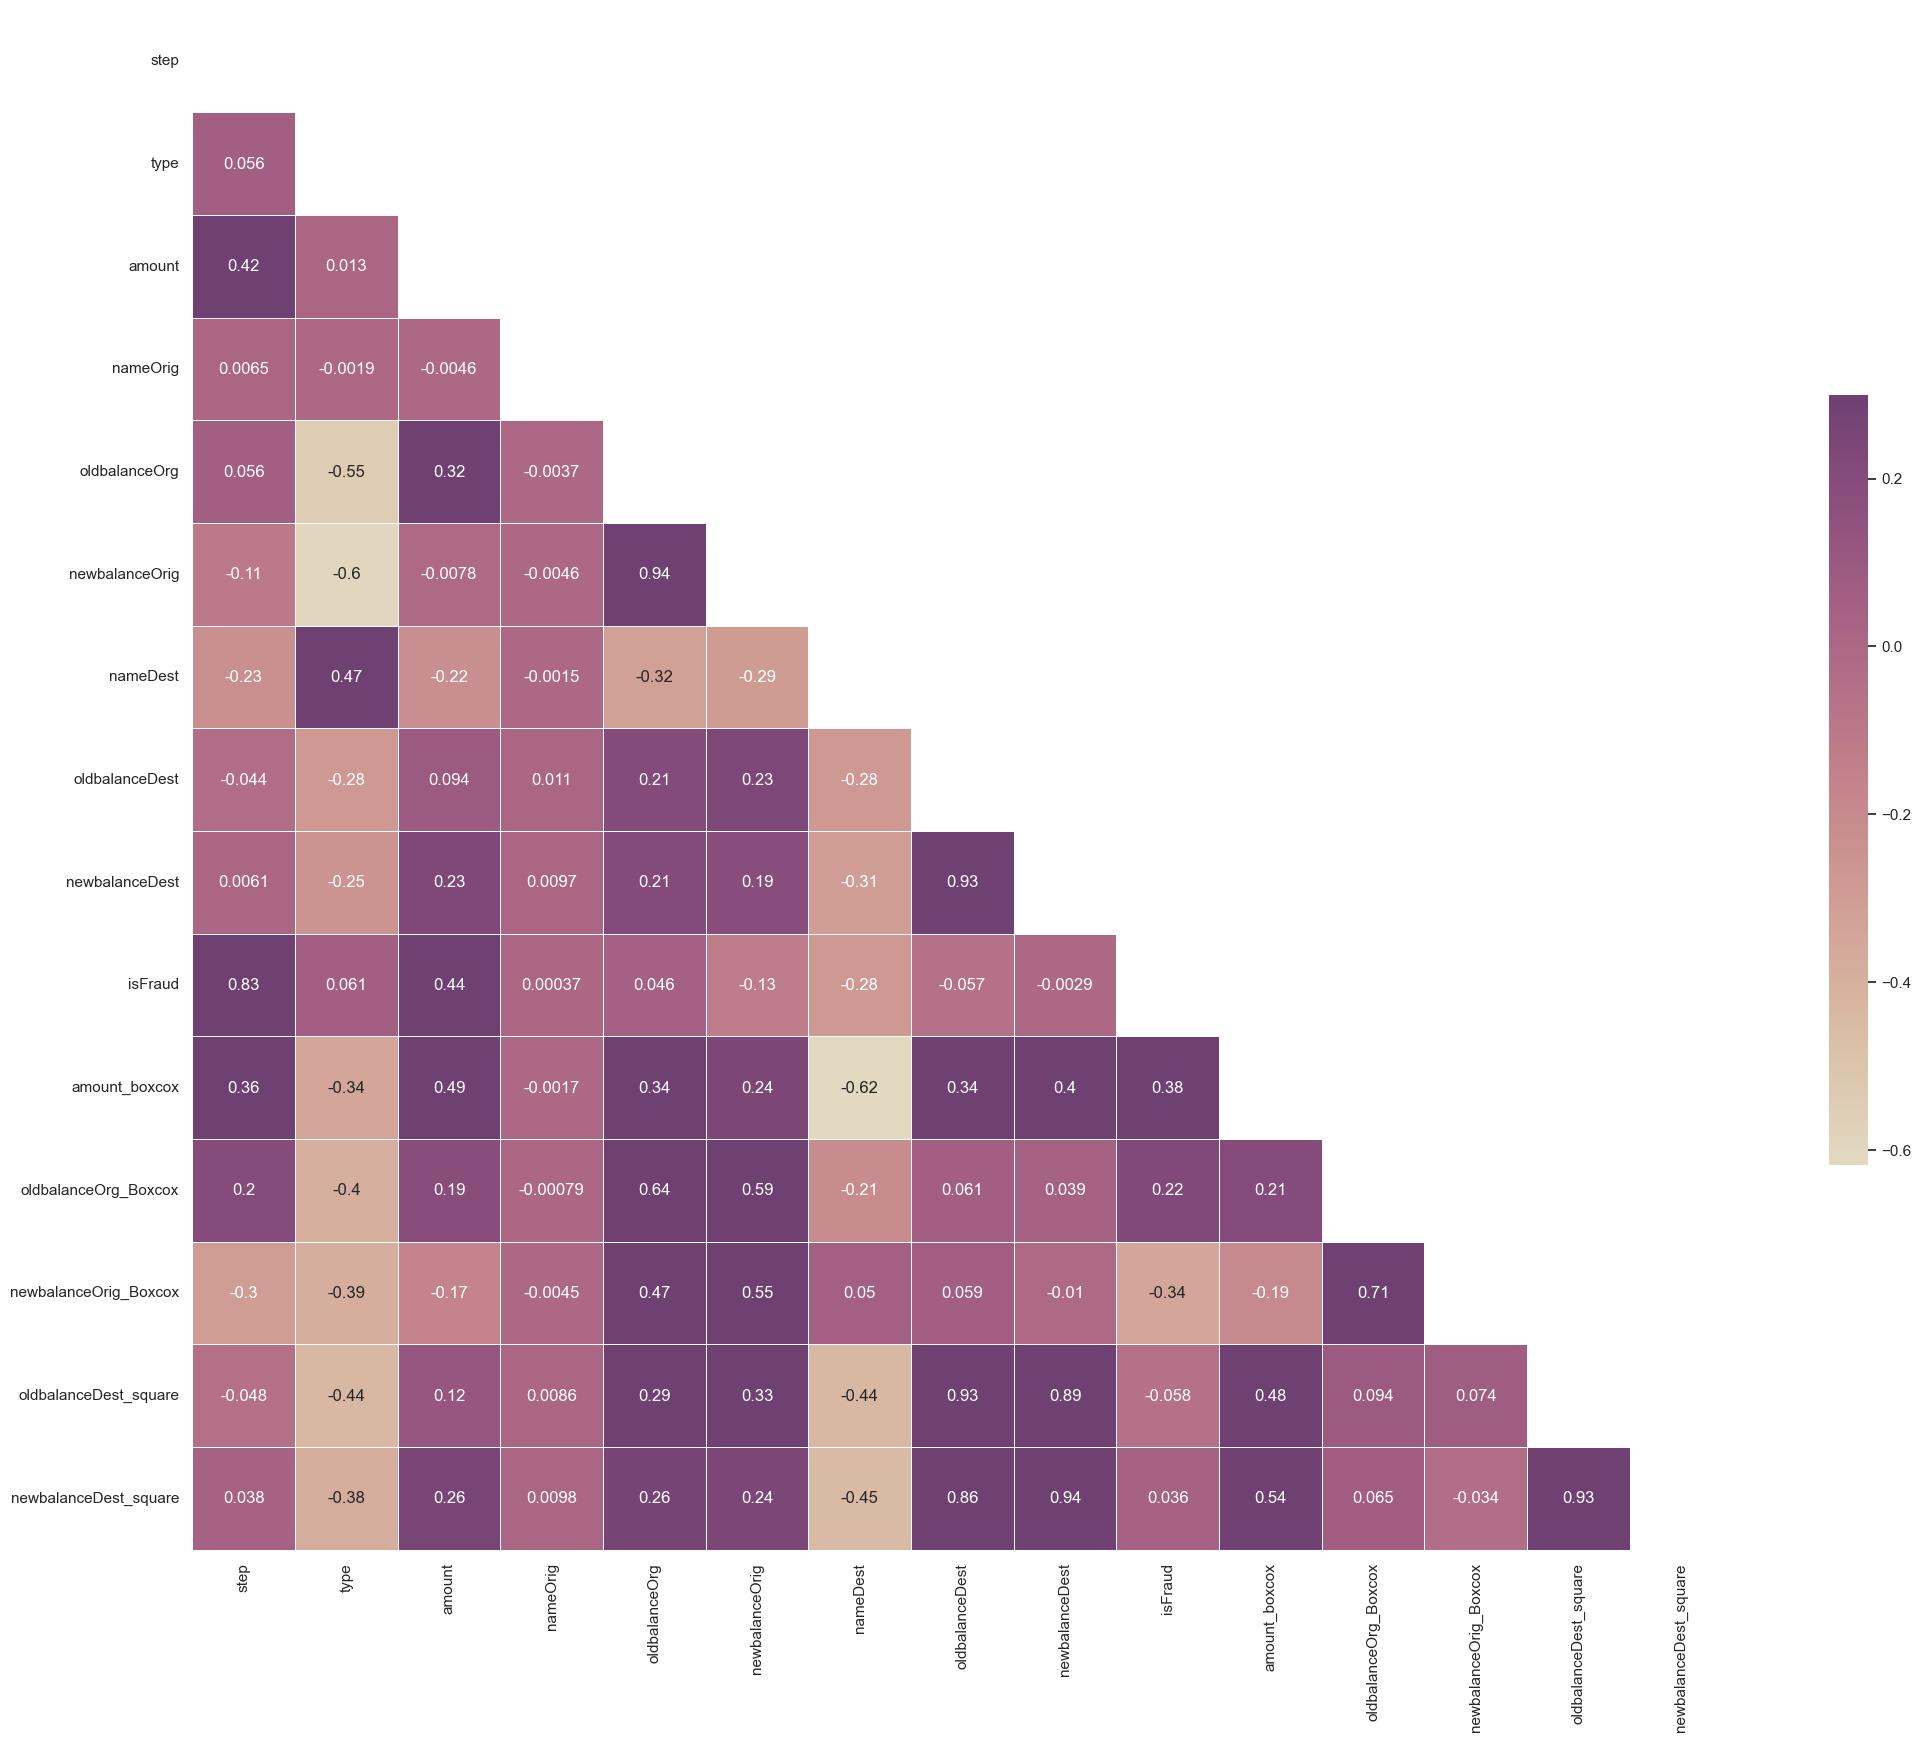

In [118]:
sns.set_theme(style="white")

# Compute the correlation matrix
corr = fraud_data.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(25, 20))

# Generate a custom diverging colormap
cmap = sns.color_palette("ch:s=-.2,r=.6", as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5},annot=True)

## Model Training

- We have implemented 4 algorithms for this problem statement that are Logistic Regression, Decision Tree, Random Forest XGBoost Classifier.
- Here we used the normally distributed parameters that we created after using boxcox method on original parameters for Logistic Regression algorithm(because this algorithm is sensitive to skewed data).
- For handling imbalanced target variable we used :
    - SMOTETomek method for Logistic Regression
    - class_weight parameters present in Decision Tree and Random Forest
    - scale_pos_weight parameter in the XGBoost Classifier
- A dictionary is created where parameters are tuned for all algorithms except Logistic Regression(all other algorithms are put in dictionary as they are robust to skewed data and we used original parameters for them)
- Then we have used GridSearchCV and K-fold cross validation for hyperparameter tuning.

In [119]:
logistic_col = ['step', 'type', 'amount_boxcox',	'oldbalanceOrg_Boxcox', 'newbalanceOrig_Boxcox', 'oldbalanceDest_square', 'newbalanceDest_square']
target = "isFraud"
X_logistic  = fraud_data[logistic_col]
Y_logistic = fraud_data[target]

In [120]:
X_resampled, Y_resampled = SMOTE(random_state=42).fit_resample(X_logistic,Y_logistic)

In [121]:
X_train,X_test,y_train,y_test=train_test_split(X_resampled,Y_resampled,train_size=0.7)
log_class=LogisticRegression()
grid={'C':[1,5,10],'penalty':['l1','l2']}
cv=KFold(n_splits=5,random_state=None,shuffle=False)
clf=GridSearchCV(log_class,grid,cv=cv,scoring='f1_macro')
clf.fit(X_train,y_train)
y_pred=clf.predict(X_test)
print(confusion_matrix(y_test,y_pred))
print(accuracy_score(y_test,y_pred))

f:\anaconda2024\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
f:\anaconda2024\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimiz

[[2886   88]
 [  68 2958]]
0.974


f:\anaconda2024\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [122]:
model_params = {
    'random_forest': {
        'model': RandomForestClassifier(),
        'params' : {
            'n_estimators': [10,20,30],
	        'criterion' : ['gini', 'entropy'],
		    'class_weight': [dict({0:1,1:8})]
        }
    },
    'xgb_classifier': {
        'model': xgb.XGBClassifier(base_score=0.5, booster='gbtree',learning_rate=0.01),
        'params' : {
            'n_estimators': [100,200,500],
	        'objective':['reg:linear', 'reg:squarederror', 'reg:logistic', 'binary:logistic'],
            'max_depth':[3,6],
            'scale_pos_weight': [8]
        }
    }, 	
    'decision_tree': {
        'model': DecisionTreeClassifier(),
        'params': {
            'criterion': ['gini','entropy'],
            'class_weight': [dict({0:1,1:8})]	
            
        }
    }
}

In [123]:
my_data = ['step', 'type',	'amount', 'oldbalanceOrg',	'newbalanceOrig', 'oldbalanceDest', 'newbalanceDest']
my_target = "isFraud"
X = fraud_data[my_data]
Y = fraud_data[my_target]
X_train,X_test,y_train,y_test=train_test_split(X,Y,train_size=0.7)
cv=KFold(n_splits=5,random_state=None,shuffle=False)
scores = []

for model_name, mp in model_params.items():
    clf =  GridSearchCV(mp['model'], mp['params'], cv=cv, scoring='f1_macro', return_train_score=False)
    clf.fit(X_train, y_train)
    y_pred=clf.predict(X_test)	
    scores.append({
        'model': model_name,
        'best_score': clf.best_score_,
        'best_params': clf.best_params_,
        'matrix': confusion_matrix(y_test, y_pred, labels=clf.classes_),
        'report': classification_report(y_test, y_pred)
    })
	
    
df = pd.DataFrame(scores,columns=['model','best_score','best_params','matrix'])
df

f:\anaconda2024\Lib\site-packages\xgboost\training.py:183: UserWarning: [23:46:54] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\objective\regression_obj.cu:250: reg:linear is now deprecated in favor of reg:squarederror.
  bst.update(dtrain, iteration=i, fobj=obj)
f:\anaconda2024\Lib\site-packages\xgboost\training.py:183: UserWarning: [23:46:54] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\objective\regression_obj.cu:250: reg:linear is now deprecated in favor of reg:squarederror.
  bst.update(dtrain, iteration=i, fobj=obj)
f:\anaconda2024\Lib\site-packages\xgboost\training.py:183: UserWarning: [23:46:54] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\objective\regression_obj.cu:250: reg:linear is now deprecated in favor of reg:squarederror.
  bst.update(dtrain, iteration=i, fobj=obj)
f:\anaconda2024\Lib\site-packages\xgboost\training.py:183: UserWarning: [23:46:54] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\objective\regression_obj.cu:250: reg:linear is n

,model,best_score,best_params,matrix
0,random_forest,0.992390,"{'class_weight': {0: 1, 1: 8}, 'criterion': 'g...","[[2994, 0], [11, 338]]"
1,xgb_classifier,0.991932,"{'max_depth': 6, 'n_estimators': 500, 'objecti...","[[2992, 2], [2, 347]]"
2,decision_tree,0.989265,"{'class_weight': {0: 1, 1: 8}, 'criterion': 'e...","[[2988, 6], [11, 338]]"


## Model Evaluation

- We print classification report, confusion matrix, accuracy and evaluated the Models using this. We also plotted confusion matrix.
- Now we evaluate the models that we have implemented we have to use Recall along with accuracy because we want lower False Negatives(the fraud transaction must not be predicted as non fraud) in our problem statement, so we want high Recall.

random_forest
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2994
           1       1.00      0.97      0.98       349

    accuracy                           1.00      3343
   macro avg       1.00      0.98      0.99      3343
weighted avg       1.00      1.00      1.00      3343



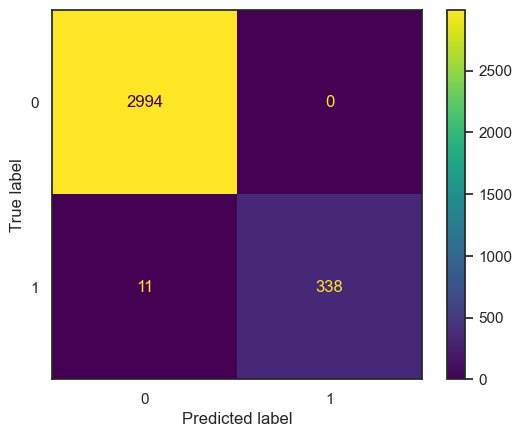

xgb_classifier
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2994
           1       0.99      0.99      0.99       349

    accuracy                           1.00      3343
   macro avg       1.00      1.00      1.00      3343
weighted avg       1.00      1.00      1.00      3343



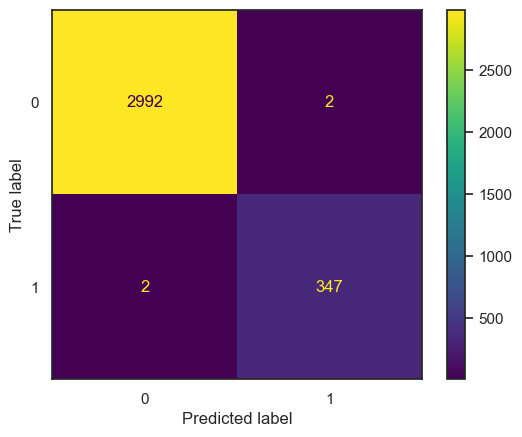

decision_tree
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2994
           1       0.98      0.97      0.98       349

    accuracy                           0.99      3343
   macro avg       0.99      0.98      0.99      3343
weighted avg       0.99      0.99      0.99      3343



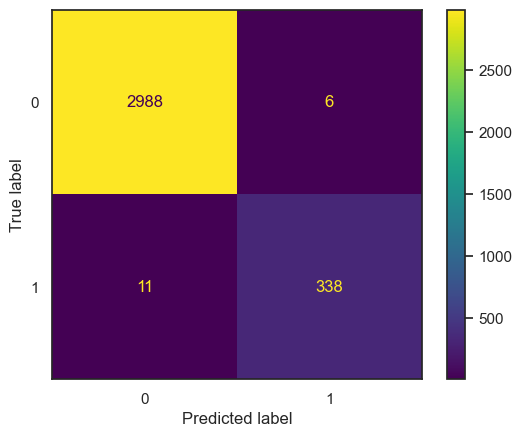

In [124]:
for item in scores:
    print(item['model'])
    print(item['report'])
    disp = ConfusionMatrixDisplay(confusion_matrix=item['matrix'])
    disp.plot()
    plt.show()